In [1]:
from bertopic import BERTopic, representation
import openai

In [2]:
with open("../datasets/ostrava_projekty_obcane.txt") as responses_fd:
    responses = [r.strip() for r in responses_fd.readlines() if len(r.strip()) != 0]
len(responses)

3953

In [32]:
client = openai.OpenAI()
topic_model = BERTopic(language='czech', min_topic_size=25)
topic_model.fit(responses)

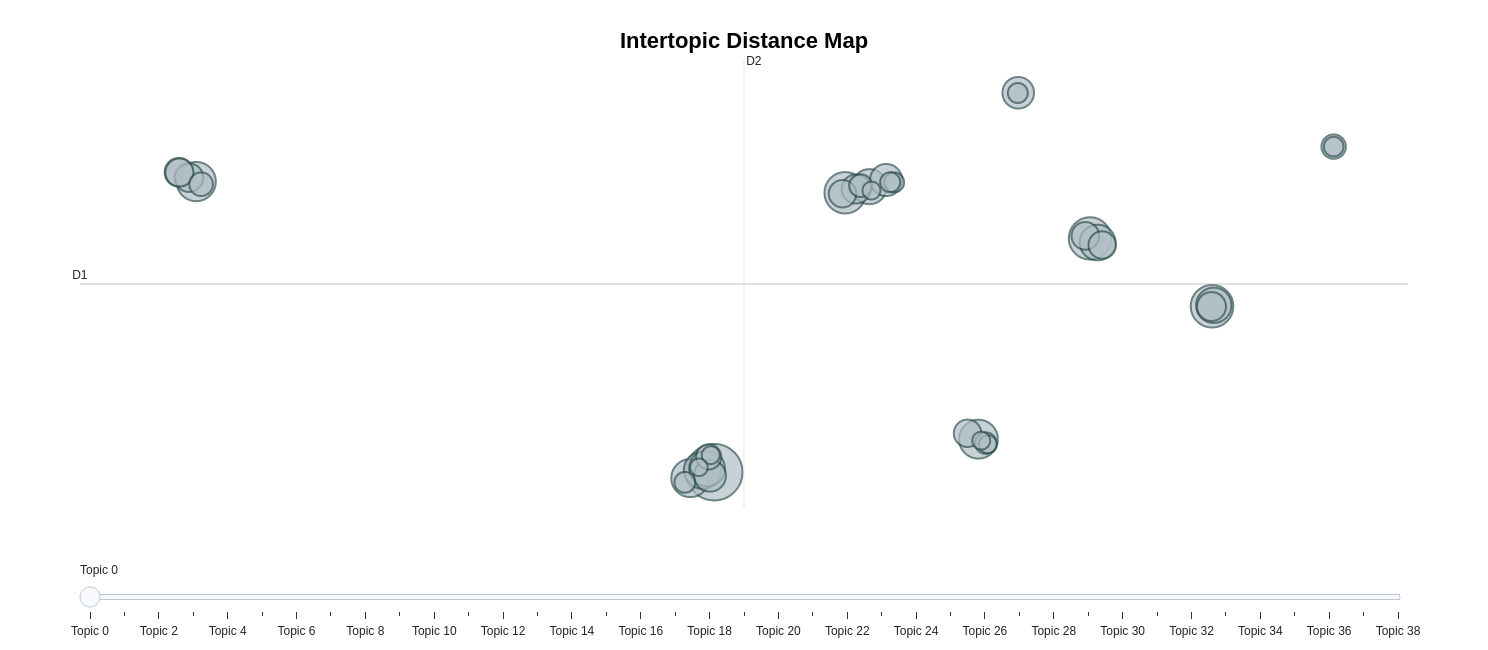

In [33]:
topic_model.visualize_topics()

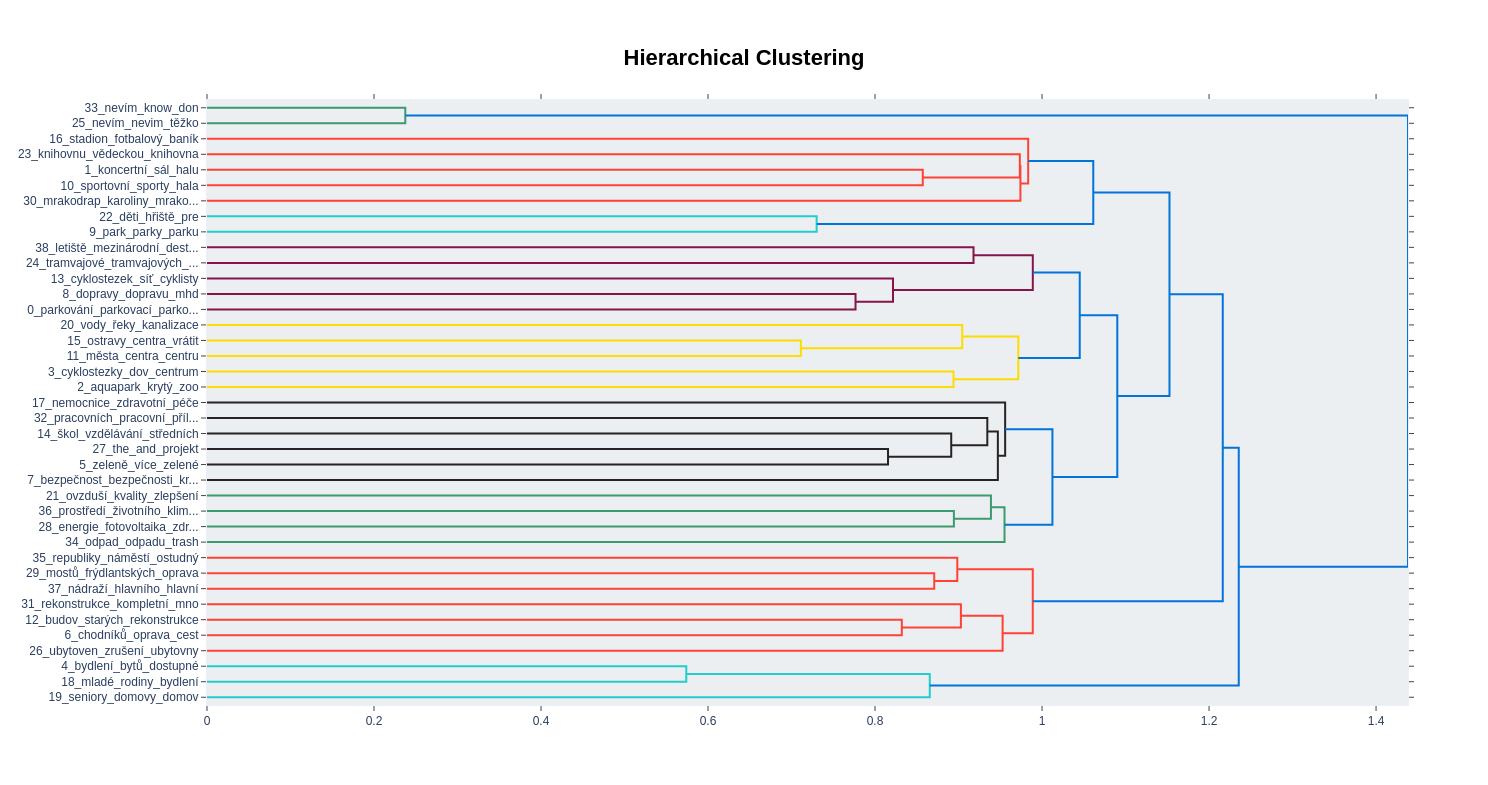

In [34]:
topic_model.visualize_hierarchy()

[218.95852174 130.21925016 129.40569649 141.61730061 137.80584763
 146.76311636 139.87959834 118.21375483 162.63475841 132.14938683
 116.14600993 144.51533025 125.88773014 129.34506524 100.37029106
 128.81027208  78.40957844  84.47742782 113.87630458  89.61976135
  93.28998354  73.66362165 103.50004073  81.89200408 107.73103431
  59.48068773  80.33169031 124.08146764  76.38330242  57.53870498
  45.62334173  57.73990943  66.79150961  31.95416745  65.26338099
  51.11566605  66.60134754  74.95516388  44.95797366]


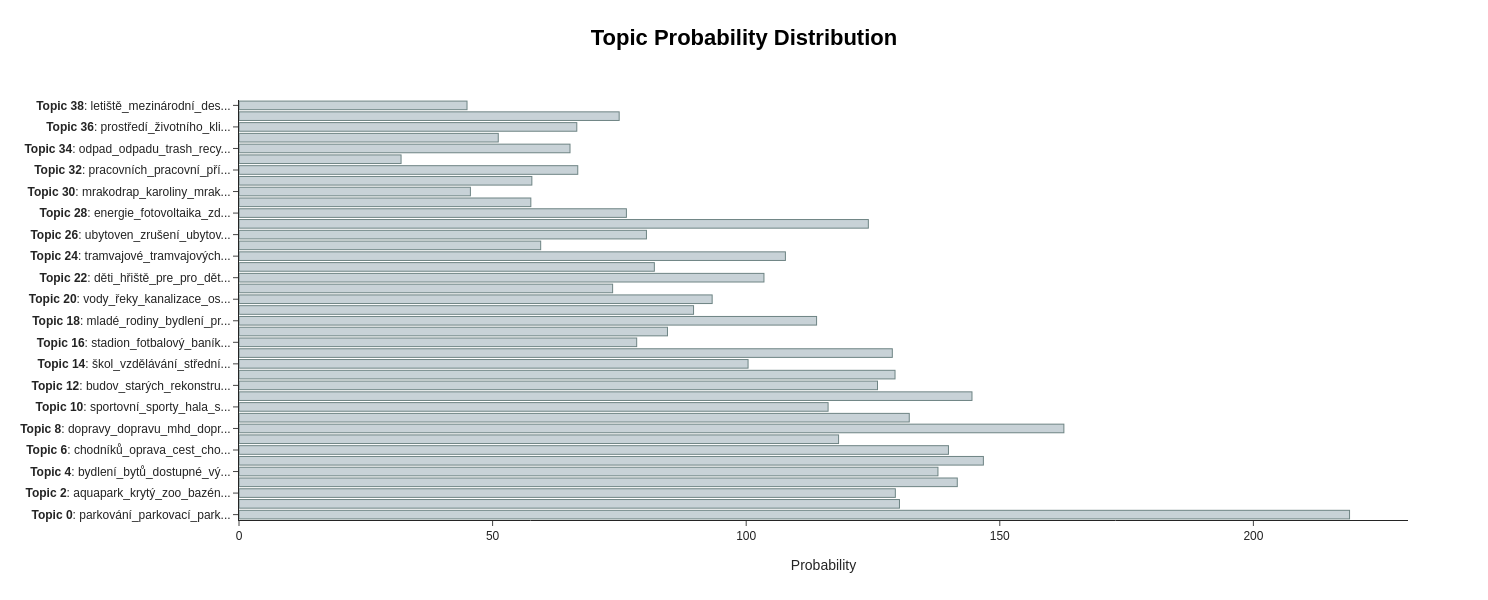

In [35]:
topic_distr, _ = topic_model.approximate_distribution(responses, min_similarity=0)
print(topic_distr.sum(axis=0))
topic_model.visualize_distribution(topic_distr.sum(axis=0))

In [40]:
with open("../datasets/ostrava_words.txt") as responses_fd:
    words = [r.strip() for r in responses_fd.readlines() if len(r.strip()) != 0]
    words = [w for g in words for w in g.replace(',', ' ').split()]

len(words)

15188

In [56]:
word_model = BERTopic(language='czech', min_topic_size=40)
word_model.fit(words)

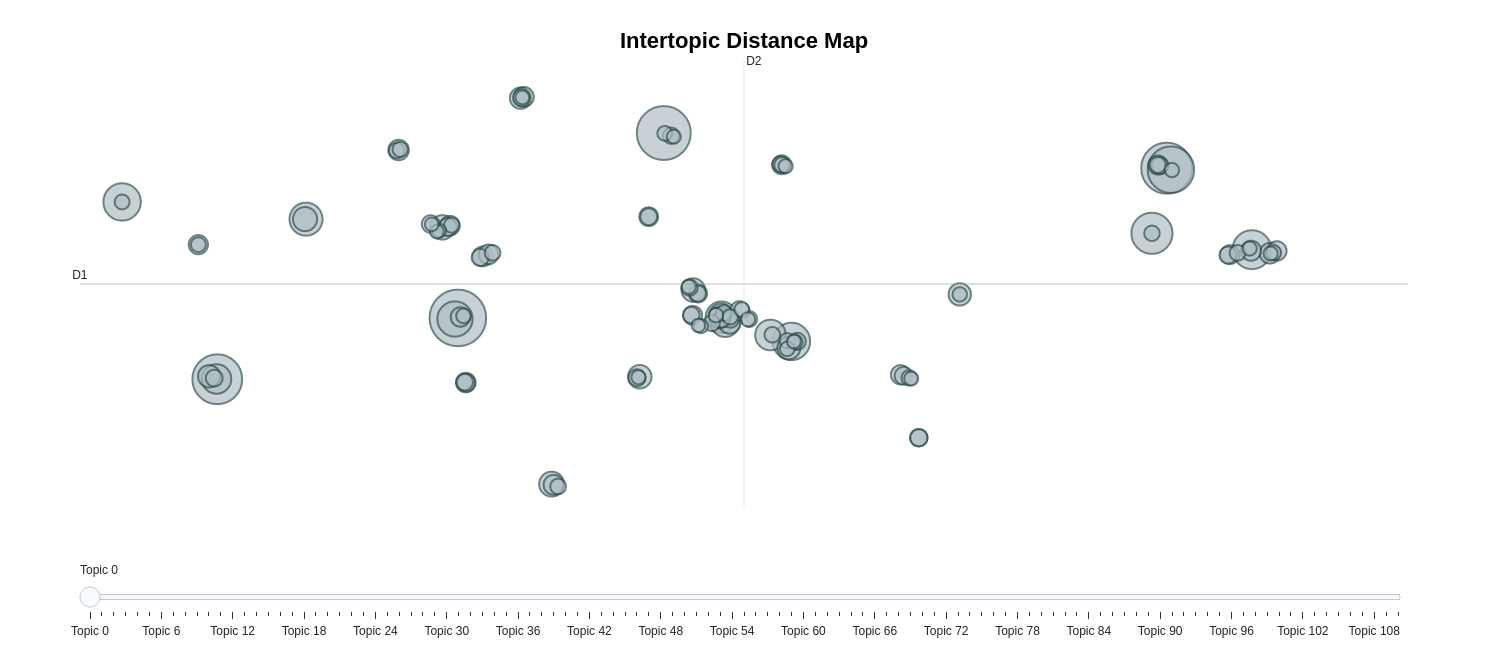

In [57]:
word_model.visualize_topics()

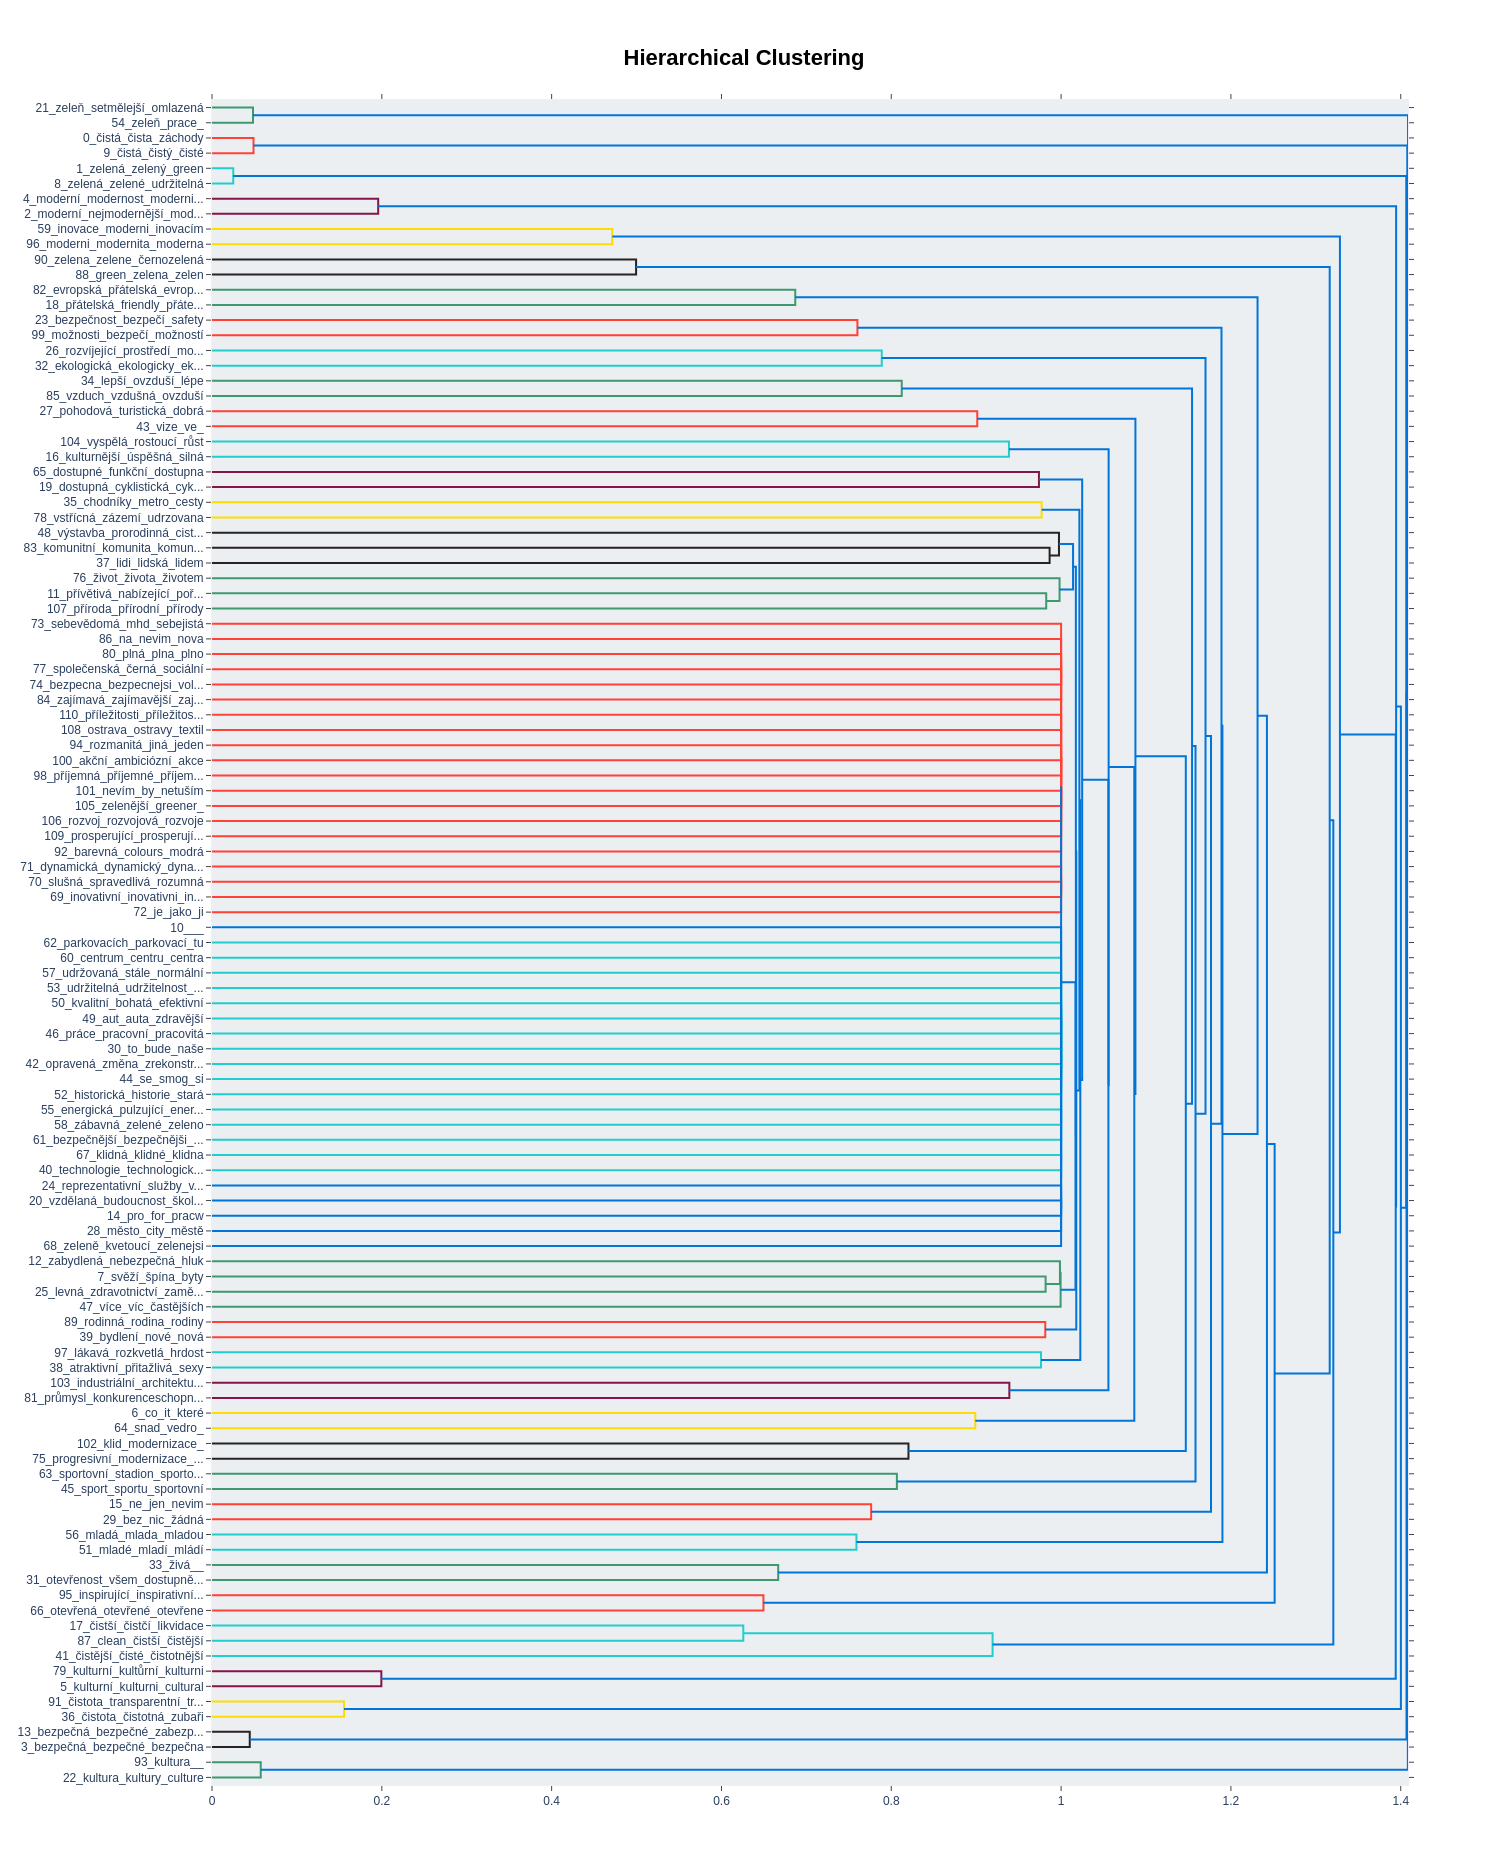

In [58]:
word_model.visualize_hierarchy()

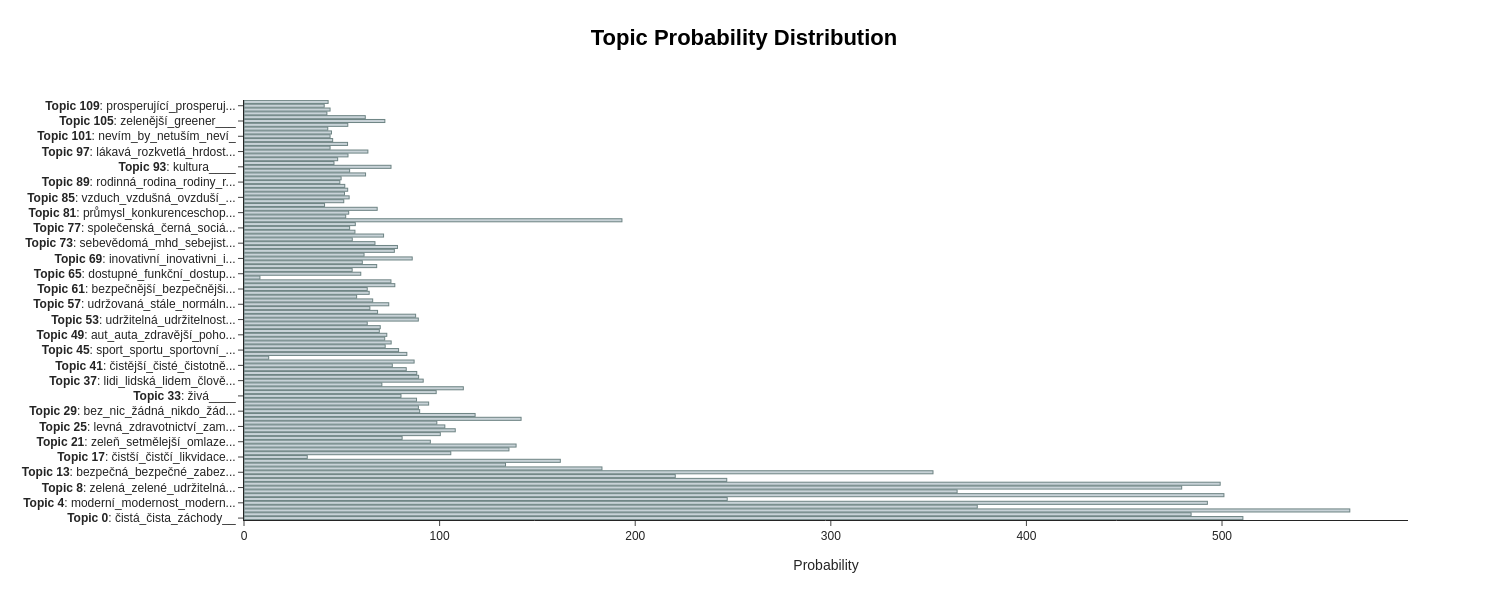

In [59]:
words_distr, _ = word_model.approximate_distribution(words, min_similarity=0)
word_model.visualize_distribution(words_distr.sum(axis=0))